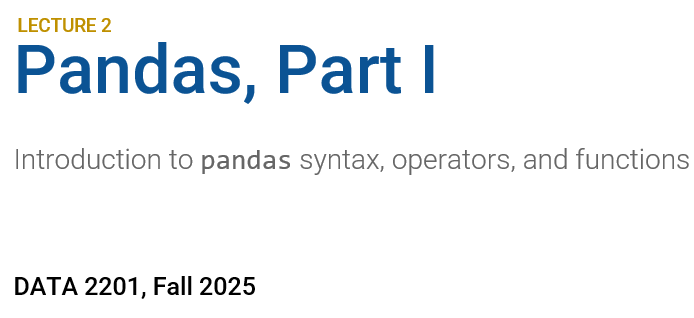

### A high-level overview of the [`pandas`](https://pandas.pydata.org) library to accompany Lecture 2.

In [ ]:
# `pd` is the conventional alias for Pandas, as `np` is for NumPy
import pandas as pd

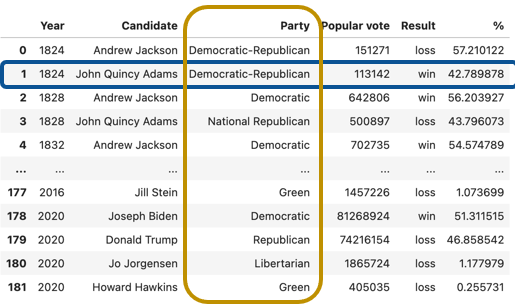

- A row represents one observation (here, a single person running for president in a particular year).
- A column represents some characteristic, or feature, of that observation (here, the political party of that person).

# Series, DataFrames, and Indices 

Series, DataFrames, and Indices are fundamental `pandas` data structures for storing tabular data and processing the data using vectorized operations.

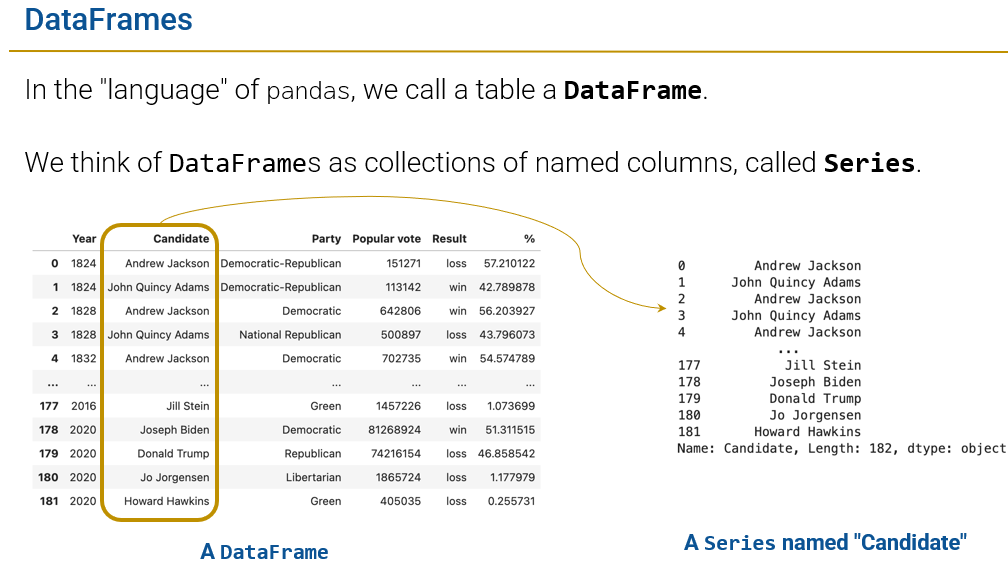

## Series

A `Series` is a 1-D labeled array of data. We can think of it as columnar data. 

### Creating a new `Series` object
Below, we create a `Series` object and will look into its two components: 1) values and 2) index.

In [ ]:
s = pd.Series(["welcome", "to", "data 2201"])

s

In [ ]:
# Find values of 's'


In [ ]:
# Find index of 's'


In the example above, `pandas` automatically generated an `Index` of integer labels. 

We can also create a `Series` object by providing a custom `Index`.

In [ ]:
s = pd.Series([-1, 10, 2], index = ["a", "b", "c"])
s

In [ ]:
s.values

In [ ]:
s.index

After it has been created, we can reassign the Index of a `Series` to a new Index.

In [ ]:
s.index = ["first", "second", "third"]
s

### Selection in Series
We can select a single value or a set of values in a `Series` using:
- A single label
- A list of labels
- A filtering condition

In [ ]:
s = pd.Series([4, -2, 0, 6], index = ["a", "b", "c", "d"])
s

**Selection using one or more label(s)**

In [ ]:
# Selection using a single label
# Notice how the return value is a single array element


In [ ]:
# Selection using a list of labels
# Notice how the return value is another Series


**Selection using a filter condition**

In [ ]:
# Filter condition: select all elements greater than 0


In [ ]:
# Use the Boolean filter to select data from the original Series


### Exercise - Check your understanding

What is the result of the following code?

```python
example = pd.Series([4, 5, 6], index = ["one", "two", "three"])
example[example > 4].values
```

<br><details><summary>Click for Solution</summary> <br>
    
```python
array([5, 6])
```
    
<br></details><br>


## DataFrame

A `DataFrame` is a 2-D tabular data structure with both row and column labels. In this lecture, we will see how a `DataFrame` can be created from scratch or loaded from a file. 

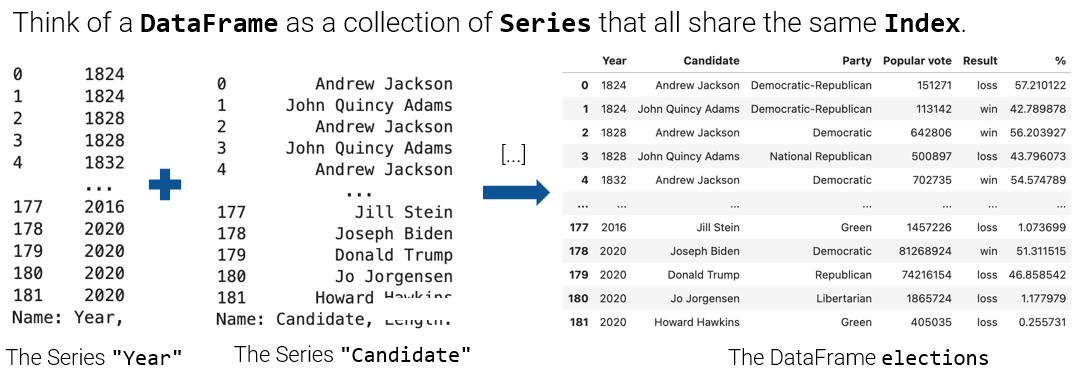

## Creating a new `DataFrame` object
We can also create a `DataFrame` in a variety of ways. Here, we cover the following:
1. From a CSV file
2. Using a list and column names
3. From a dictionary
4. From a `Series`


### Creating a `DataFrame` from a CSV file
For loading data into a `DataFrame`, `pandas` has a number of very useful file reading tools. We'll be using `read_csv` today to load data from a CSV file into a `DataFrame` object. 

In [ ]:
elections = pd.read_csv("../data/elections.csv")
elections

By passing a column to the `index_col` attribute, the `Index` can be defined at the initialization.

In [ ]:
elections = pd.read_csv("../data/elections.csv", index_col = "Candidate")
elections

### Creating a `DataFrame` using a list and column names

In [ ]:
# Creating a single-column DataFrame using a list
df_list_1 = pd.DataFrame([1, 2, 3], 
                         columns = ["Number"])
display(df_list_1)

In [ ]:
# Creating a multi-column DataFrame using a list of lists
df_list_2 = pd.DataFrame([[1, "one"], [2, "two"]], 
                         columns = ["Number", "Description"])
df_list_2

### Creating a `DataFrame` from a dictionary

In [ ]:
# Creating a DataFrame from a dictionary of columns
df_dict_1 = pd.DataFrame({"Fruit":["Strawberry", "Orange"], 
                          "Price":[5.49, 3.99]})
df_dict_1

In [ ]:
# Creating a DataFrame from a list of row dictionaries
df_dict_2 = pd.DataFrame([{"Fruit":"Strawberry", "Price":5.49}, 
                          {"Fruit":"Orange", "Price":3.99}])
df_dict_2

### Creating a `DataFrame` from a `Series`

In [ ]:
# In the examples below, we create a DataFrame from a Series

s_a = pd.Series(["a1", "a2", "a3"], index = ["r1", "r2", "r3"])
s_b = pd.Series(["b1", "b2", "b3"], index = ["r1", "r2", "r3"])

In [ ]:
# Passing Series objects for columns
df_ser = pd.DataFrame({"A-column":s_a, "B-column":s_b})
df_ser

In [ ]:
# Passing a Series to the DataFrame constructor to make a one-column dataframe
df_ser = ...
df_ser

In [ ]:
# Using to_frame() to convert a Series to DataFrame
ser_to_df = ...
ser_to_df

In [ ]:
# Creating a DataFrame from a CSV file and specifying the Index column
elections = pd.read_csv("../data/elections.csv", index_col = "Candidate")
elections.head(5) # Using `.head` shows only the first 5 rows to save space

In [ ]:
# Need to reset the index to keep 'Candidate' as one of the DataFrane Columns
elections.reset_index(inplace = True) 
# This sets the index to the "Candidate" column
elections.set_index("Party", inplace=True) 
elections

## `DataFrame` attributes: `index`, `columns`, and `shape`

The `Index` column can be set to the default list of integers by calling `reset_index()` on a `DataFrame`.

In [ ]:
# Revert the index back to its default numeric labeling
elections... 
elections

In [ ]:
elections.shape

### Exercise - Check your understanding 

What is the result of the following code? 

```python
df = pd.DataFrame({"c1":[1, 2, 3, 4], "c2":[2, 4, 6, 8]})
df.columns
```

<br><details><summary>Click for Solution</summary> <br>
    
```python
Index(['c1', 'c2'], dtype='object')
```
    
<br></details><br>

## Slicing in `DataFrame`s

We can use `.head` to return only a few rows of a dataframe.

In [ ]:
# Loading DataFrame again to keep the original ordering of columns
elections = pd.read_csv("../data/elections.csv")

# By default, calling .head with no argument will show the first 5 rows
elections.head()

We can also use `.tail` to get the last so many rows.

## Data extraction with 'loc' and 'iloc'

### Label-Based Extraction Using`loc`

Arguments to `.loc` can be:
1. A list.
2. A slice (syntax is inclusive of the right-hand side of the slice).
3. A single value.


`loc` selects items by row and column *label*.

In [ ]:
# Selection by a list
elections.loc[[87, 25, 179], ["Year", "Candidate", "Result"]]

In [ ]:
# Selection by a list and a slice of columns


In [ ]:
# Extracting all rows using a colon


In [ ]:
# Extracting all columns using a colon


In [ ]:
# Selection by a list and a single-column label


In [ ]:
# Note that if we pass "Popular vote" in a list, the output will be a DataFrame


In [ ]:
# Selection by a row label and a column label


### Integer-Based Extraction Using `iloc`

`iloc` selects items by row and column *integer* position.

Arguments to `.iloc` can be:
1. A list.
2. A slice (syntax is exclusive of the right hand side of the slice).
3. A single value.


## Example
- Select the rows at positions 1, 2, and 3.
- Select the columns at positions 0, 1, and 2.
- Remember that Python indexing begins at position 0!
<details>
<summary>Click to show solution</summary>

<pre>
elections.iloc[[1, 2, 3], [0, 1, 2]]
</pre>
</details>



In [ ]:
# Select the rows at positions 1, 2, and 3.
# Select the columns at positions 0, 1, and 2.
# Remember that Python indexing begins at position 0!


In [ ]:
# Index-based extraction using a list of rows and a slice of column indices


In [ ]:
# Selecting all rows using a colon


In [ ]:
# Extracting the value at row 0 and the second column


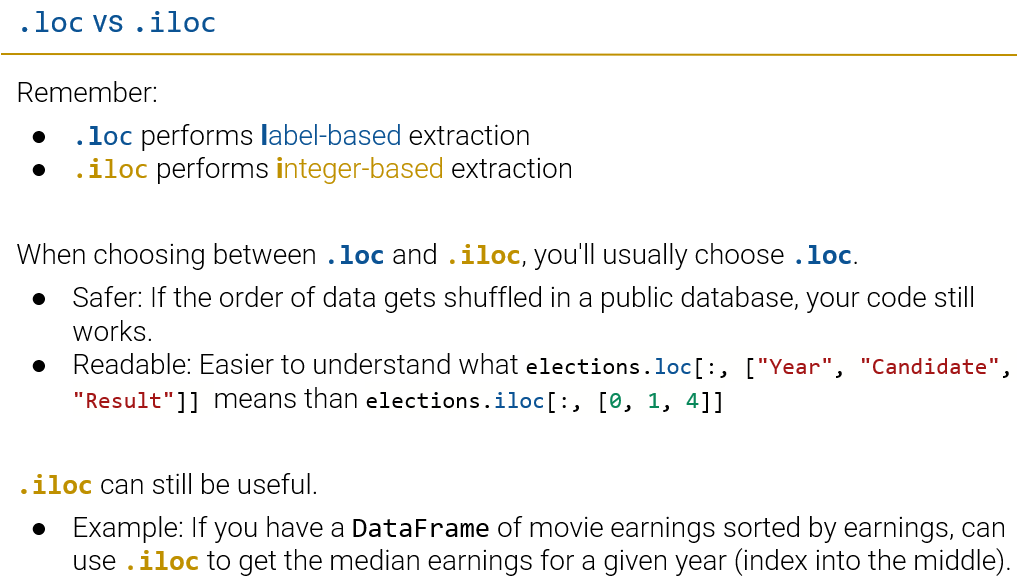

# See you next Lecture!